In [2]:
# imports

import io
import os
import sys
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.font_manager as fm
from matplotlib.colors import ListedColormap

import seaborn as sns
import pandas as pd
import numpy as np

   shuffle_ratio freqdrop_score silhouette_score naive_tree_dist_score
0          0.000          0.963            0.920                 0.963
1          0.100          0.846            0.334                 0.828
2          0.200          0.765            0.199                 0.687
3          0.300          0.685            0.224                 0.566
4          0.400          0.595            0.247                 0.489
5          0.500          0.487            0.275                 0.376
6          0.600          0.429            0.285                 0.333
7          0.700          0.264            0.335                 0.247
8          0.800          0.188            0.350                 0.239
9          0.900          0.123            0.365                 0.212
10         1.000          0.079            0.371                 0.201


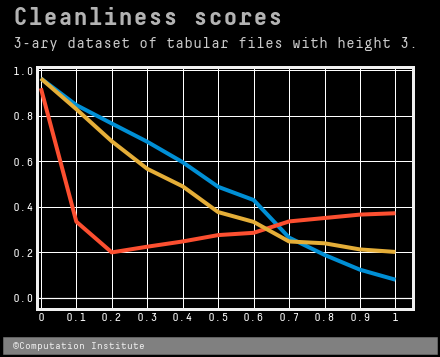

In [9]:
rows = []
with open("shuffled_test_data.csv", 'r') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='|')
    rows = list(rows)
numerical_rows = rows[1:len(rows)]
scores_array = np.array(numerical_rows)

# delete last column, it's empty
scores_array = np.delete(scores_array, 4, 1)
scores = pd.DataFrame(scores_array)
scores.columns = ['shuffle_ratio',
                  'freqdrop_score',
                  'silhouette_score',
                  'naive_tree_dist_score']
print(scores)

fig, ax = plt.subplots(figsize=(6, 5))
scores = scores.astype(float)
plt.sca(ax)
style.use('fivethirtyeight')

# xtick labels
labels = ['0', '0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1']

# set range of xticks
plt.xticks(range(11), labels)

# create plot object
scores_graph = scores.plot(x='shuffle_ratio', 
                           ax=ax, 
                           use_index=False, 
                           legend=False)

# set size of tick labels
scores_graph.tick_params(axis = 'both', 
                         which = 'major', 
                         labelsize = 12)

# import font
prop = fm.FontProperties(fname='DecimaMonoPro.ttf')

# set font for tick labels
for tick in scores_graph.get_xticklabels():
    tick.set_fontname("DecimaMonoPro")
for tick in scores_graph.get_yticklabels():
    tick.set_fontname("DecimaMonoPro")
    
ax.tick_params(colors='white', grid_color='white')

# create bolded x-axis
scores_graph.axhline(y = 0, 
                     color = 'white', 
                     linewidth = 1.3, 
                     alpha = .7)

# set size of limits for x-axis
scores_graph.set_xlim(left = -0.1, right = 10.5)

# banner
scores_graph.text(x = -0.95, y = -0.22,
                  s = ' ©Computation Institute                                                ',
                  fontsize = 10, 
                  color = '#f0f0f0', 
                  fontname="DecimaMonoPro", 
                  backgroundcolor = 'grey')

# title
scores_graph.text(x = -0.8, y = 1.2, 
                  s = "Cleanliness scores",
                  fontsize = 25, 
                  weight = 'bold', 
                  alpha = .75, 
                  color = '#f0f0f0', 
                  fontname="DecimaMonoPro-Bold")

# subtitle
scores_graph.text(x = -0.8, y = 1.1, 
                  s = '3-ary dataset of tabular files with height 3. ',
                  fontsize = 15, 
                  alpha = .85,  
                  color = '#f0f0f0', 
                  fontname="DecimaMonoPro")

plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.13)

# background color
scores_graph.set_facecolor('xkcd:black')
fig.patch.set_facecolor('xkcd:black')

# save to .svg
plt.savefig("scores_graph.svg", dpi=300)